In [1]:
from google.colab import drive
drive.mount('/content/drive')


# Define the dataset paths
train_dir = '/content/drive/My Drive/Plants'
validation_dir = '/content/drive/My Drive/Plants'
test_dir = '/content/drive/My Drive/Plants'


Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
   rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalization for validation and test sets
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 503 images belonging to 3 classes.
Found 503 images belonging to 3 classes.
Found 503 images belonging to 3 classes.


In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model with pretrained weights, excluding the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: bacterial_leaf_blight, brown_spot, false_smut
])

# Compile the model
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16 # Import VGG16
# Load the VGG16 model with pretrained weights, excluding the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: bacterial_leaf_blight, brown_spot, false_smut
])

# Compile the model
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15  # You can adjust the number of epochs
)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 147s 4s/step - accuracy: 0.3373 - loss: 1.2362 - val_accuracy: 0.5437 - val_loss: 0.9496
Epoch 2/15
 1/15 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.4375 - loss: 0.9681

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4375 - loss: 0.9681 - val_accuracy: 0.5217 - val_loss: 0.9528
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 73s 901ms/step - accuracy: 0.5576 - loss: 0.9051 - val_accuracy: 0.6604 - val_loss: 0.7275
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3750 - loss: 1.0511 - val_accuracy: 0.5652 - val_loss: 0.6947
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 842ms/step - accuracy: 0.6408 - loss: 0.7424 - val_accuracy: 0.7312 - val_loss: 0.6331
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8125 - loss: 0.5295 - val_accuracy: 0.8261 - val_loss: 0.4921
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 17s 868ms/step - accuracy: 0.7334 - loss: 0.6135 - val_accuracy: 0.7625 - val_loss: 0.5349
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 326ms/step - accuracy: 0.7500 - loss: 0.6661 - val_accuracy: 0.8261 - val_loss: 0.5622
Epoch 9/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 36s 891ms/step - accuracy: 0.7235 - loss: 0.6219 - val_accuracy: 0.8021 - val_

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.8625 - loss: 0.3768
Test accuracy: 0.8541666865348816


In [11]:
# model = load_model('/content/drive/My Drive/Plants')
# model.save('/content/drive/My Drive/Plants')


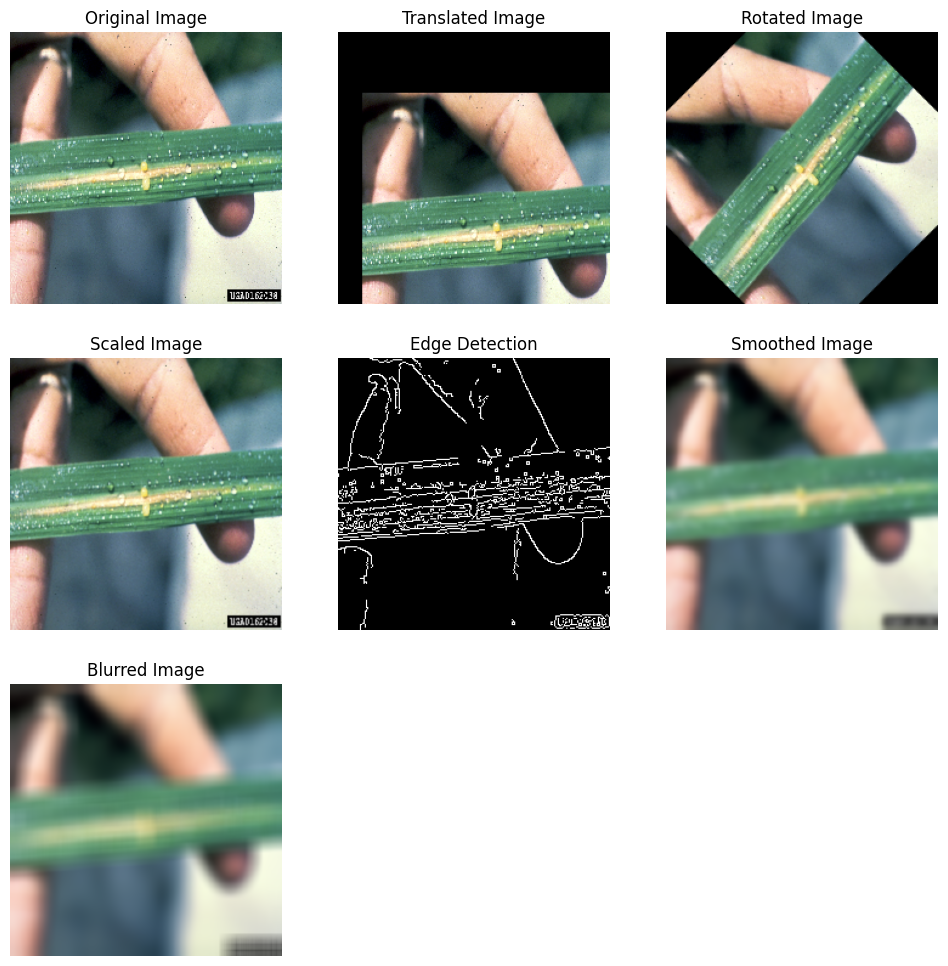

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The predicted disease for the image is: bacterial_leaf_blight


In [12]:
import cv2
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = "/content/drive/MyDrive/Plants/bacterial leaf blight of rice/BLR (12).jpg"  # Replace "path_to_your_image.jpg" with the actual image path

# Load and display the original image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
plt.figure(figsize=(12, 12))

# 1. Original Image
plt.subplot(3, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Convert to numpy array and normalize
img_array = np.array(img) / 255.0

# 2. Translation
rows, cols, _ = img_array.shape
M_translation = np.float32([[1, 0, 20], [0, 1, 50]])  # Translate by 20 pixels to the right and 50 pixels down
translated_img = cv2.warpAffine(img_array, M_translation, (cols, rows))
plt.subplot(3, 3, 2)
plt.imshow(translated_img)
plt.title('Translated Image')
plt.axis('off')

# 3. Rotation
M_rotation = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Rotate by 45 degrees
rotated_img = cv2.warpAffine(img_array, M_rotation, (cols, rows))
plt.subplot(3, 3, 3)
plt.imshow(rotated_img)
plt.title('Rotated Image')
plt.axis('off')

# 4. Scaling
scaled_img = cv2.resize(img_array, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)  # Scale by 1.5 times
plt.subplot(3, 3, 4)
plt.imshow(scaled_img)
plt.title('Scaled Image')
plt.axis('off')

# 5. Edge Detection
gray_img = cv2.cvtColor((img_array * 255).astype('uint8'), cv2.COLOR_RGB2GRAY)
edges_img = cv2.Canny(gray_img, 100, 200)
plt.subplot(3, 3, 5)
plt.imshow(edges_img, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# 6. Smoothing
smoothed_img = cv2.GaussianBlur(img_array, (15, 15), 0)
plt.subplot(3, 3, 6)
plt.imshow(smoothed_img)
plt.title('Smoothed Image')
plt.axis('off')

# 7. Blurring
blurred_img = cv2.blur(img_array, (15, 15))
plt.subplot(3, 3, 7)
plt.imshow(blurred_img)
plt.title('Blurred Image')
plt.axis('off')

plt.show()

# Now we will use the original image array for prediction
img_array = np.expand_dims(img_array, axis=0)
# Make predictions
prediction = model.predict(img_array)
class_labels = {0: 'bacterial_leaf_blight', 1: 'brown_spot', 2: 'false_smut'}
# Get the predicted class index
predicted_class_index = np.argmax(prediction)
# Map the predicted class index to the corresponding class label
predicted_class_label = class_labels[predicted_class_index]
# Print the predicted class label
print(f"The predicted disease for the image is: {predicted_class_label}")
